# Objective: Predict if a car purchased at auction is a lemon


"Kicks" -- unfortunate purchases or bad buy:
    One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. 

Here, information about used vehicles sold at auctions is provided. Modelers need to help dealers to evaluate the risk of car purchase at auction to provide best inventory selection possible to customers.

#### This is a Classification problem.

#### Step 1:  quick eyeballing to get basic sense about the dataset

Basic facts of the datasets: 
1. Dependent variable/target label (Column 2) is binary (0 for goodbuy and 1 for kick) 
2. 32 independent variables/features of categorical, numerical, and date types (Column 3 to 34)
3. dataset size: training (1 to 73014 = 73014 rows by 34 columns) and testing (73015 to 121746 = 48732 rows by 33 columns); train vs. test (size) ~= 3:2
4. missing values in many columns in both training and test datasets

#### Step 2: exploratory data analysis (EDA)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
train = pd.read_csv('training.csv')

In [3]:
# check the columns
train.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [4]:
train.shape

(72983, 34)

In [5]:
train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [7]:
nominal_fea = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']

In [8]:
num_fea = ['VehicleAge', 'VehOdo', 'WheelTypeID', 'BYRNO', 'VehBCost', 'WarrantyCost', 'IsOnlineSale']

In [9]:
X = train.iloc[:, 2:]
y = train.iloc[:, 1]

In [10]:
X.shape

(72983, 32)

In [11]:
y.shape

(72983,)

Explanations of some features:
1. Trim - different versions of the same model with different features and equipment
2. Transmission - vehicles transmission type (Automatic, Manual)
3. WheelType - vehicle wheel type description (Alloy, Covers)
4. VehOdo - vehicles odometer reading
5. MMRAcquisitionAuctionAveragePrice - acquisition price for this vehicle in average condition at time of purchase	
6. MMRAcquisitionAuctionCleanPrice - acquisition price for this vehicle in the above Average condition at time of purchase
7. MMRAcquisitionRetailAveragePrice - acquisition price for this vehicle in the retail market in average condition at time of purchase
8. MMRAcquisitonRetailCleanPrice - acquisition price for this vehicle in the retail market in above average condition at time of purchase
9. MMRCurrentAuctionAveragePrice - acquisition price for this vehicle in average condition as of current day	
10. MMRCurrentAuctionCleanPrice - acquisition price for this vehicle in the above condition as of current day
11. MMRCurrentRetailAveragePrice - acquisition price for this vehicle in the retail market in average condition as of current day
12. MMRCurrentRetailCleanPrice - acquisition price for this vehicle in the retail market in above average condition as of current day
13. PRIMEUNIT - identifies if the vehicle would have a higher demand than a standard purchase
14. AcquisitionType	- identifies how the vehicle was aquired (Auction buy, trade in, etc)
15. AUCGUART - the level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
16. KickDate - date the vehicle was kicked back to the auction
17. VehBCost - acquisition cost paid for the vehicle at time of purchase
18. IsOnlineSale - identifies if the vehicle was originally purchased online
19. WarrantyCost - warranty price (term=36month  and millage=36K) 
20. BYRNO - Unique number assigned to the buyer that purchased the vehicle

In [12]:
import seaborn as sns

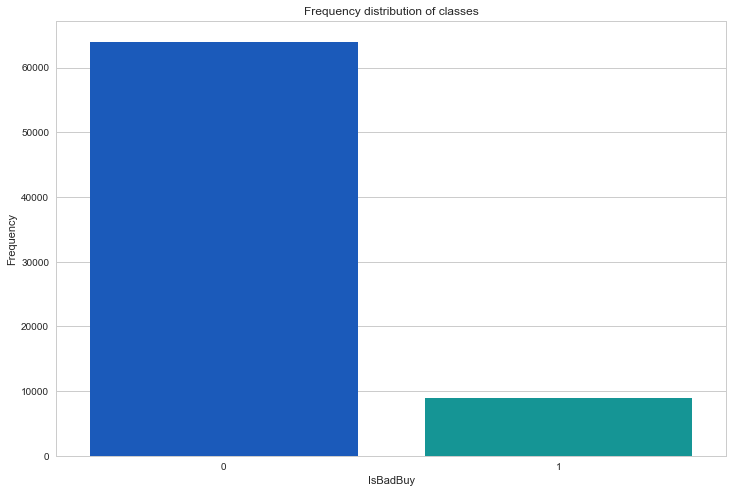

In [13]:
# quick visualization of frequency of target variable results
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="IsBadBuy", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('IsBadBuy')
plt.title('Frequency distribution of classes')
plt.show()

fact in the data: imbalanced labels - about 15% purchases were kicks 

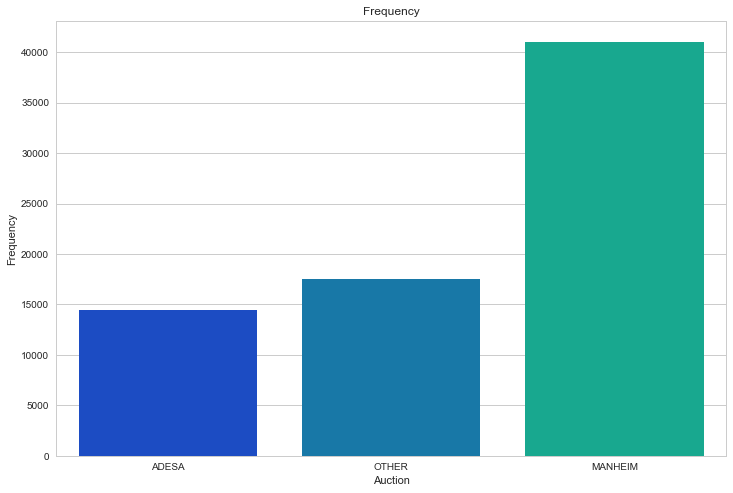

In [14]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Auction", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Auction')
plt.title('Frequency')
plt.show()

Auction feature has decent three levels

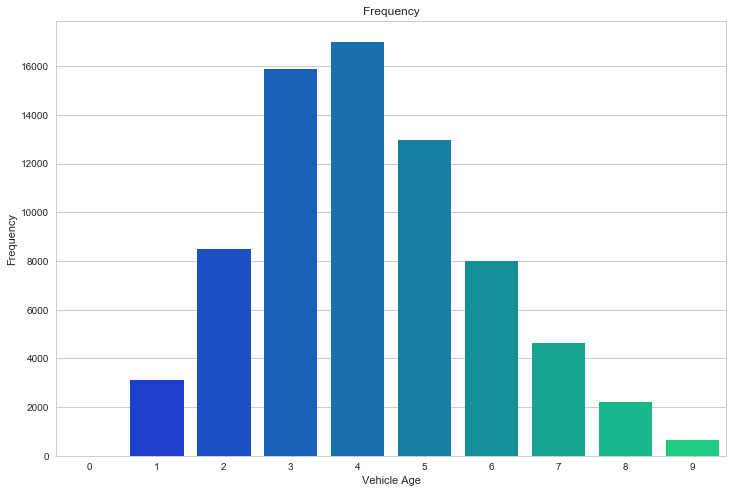

In [15]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="VehicleAge", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Vehicle Age')
plt.title('Frequency')
plt.show()

Vehicle age ranges from 1 to 9 years, with 3 to 4 years as majority

In [16]:
len(train['Make'].unique())

33

There are 33 manufacturers

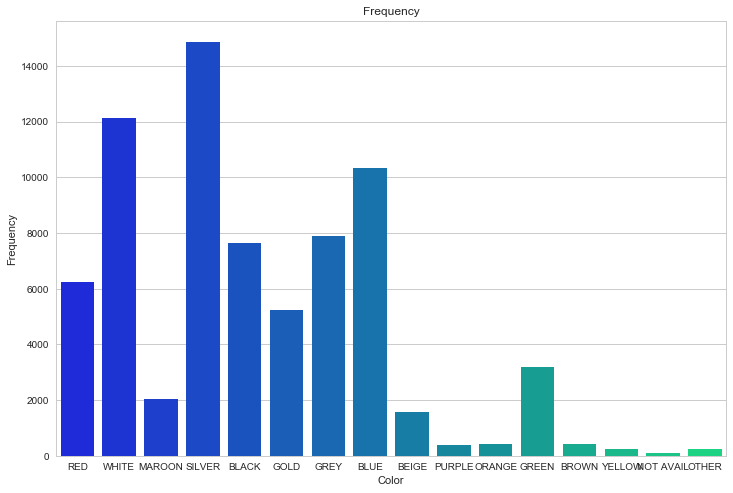

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Color", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Color')
plt.title('Frequency')
plt.show()

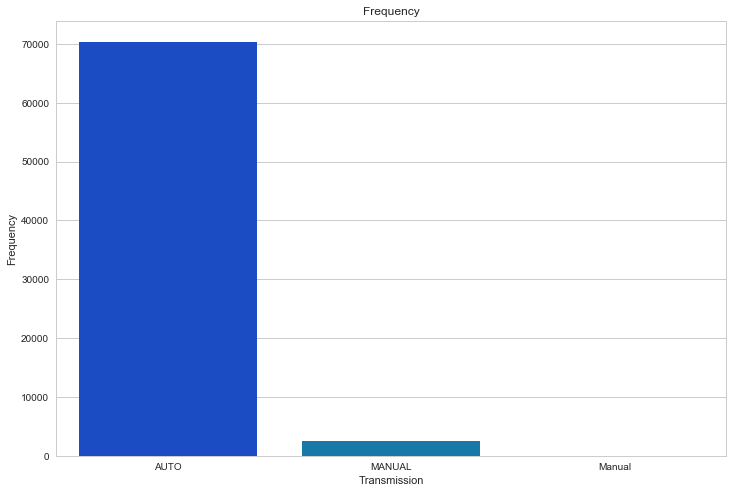

In [18]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Transmission", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Transmission')
plt.title('Frequency')
plt.show()

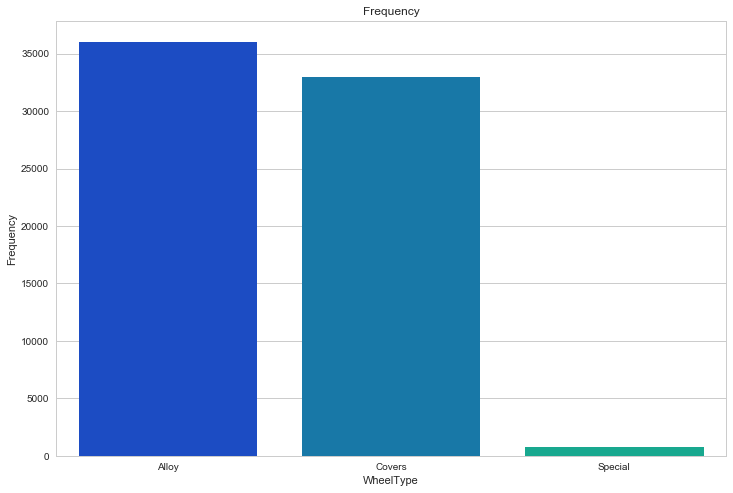

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="WheelType", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('WheelType')
plt.title('Frequency')
plt.show()

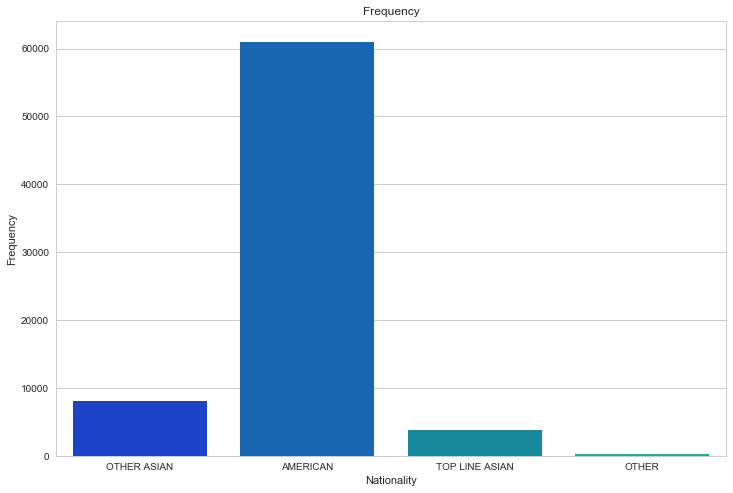

In [20]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Nationality", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Nationality')
plt.title('Frequency')
plt.show()

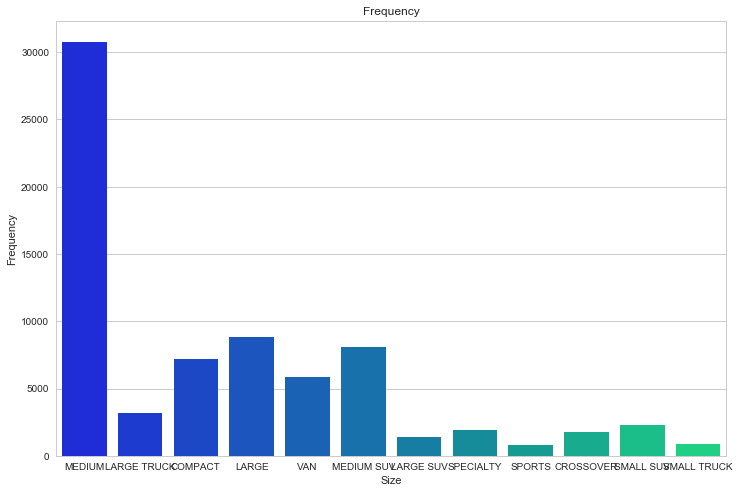

In [21]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Size", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Size')
plt.title('Frequency')
plt.show()

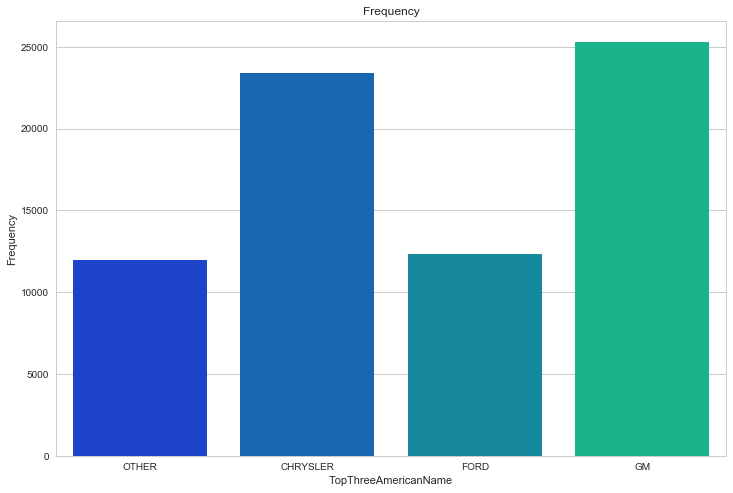

In [22]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="TopThreeAmericanName", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('TopThreeAmericanName')
plt.title('Frequency')
plt.show()

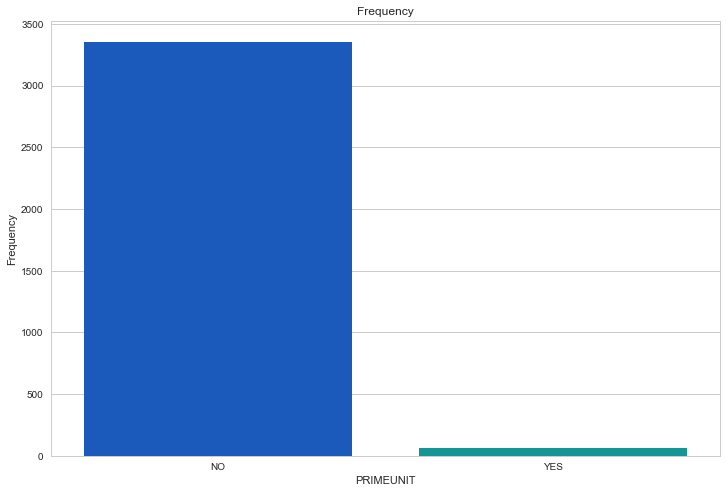

In [23]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="PRIMEUNIT", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('PRIMEUNIT')
plt.title('Frequency')
plt.show()

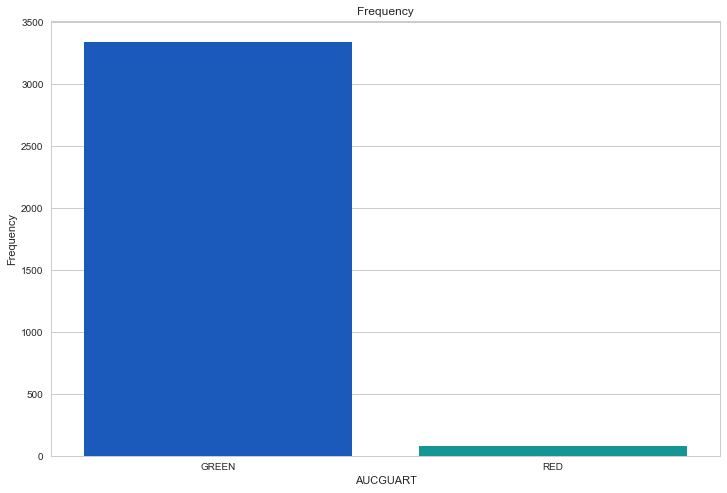

In [24]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="AUCGUART", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('AUCGUART')
plt.title('Frequency')
plt.show()

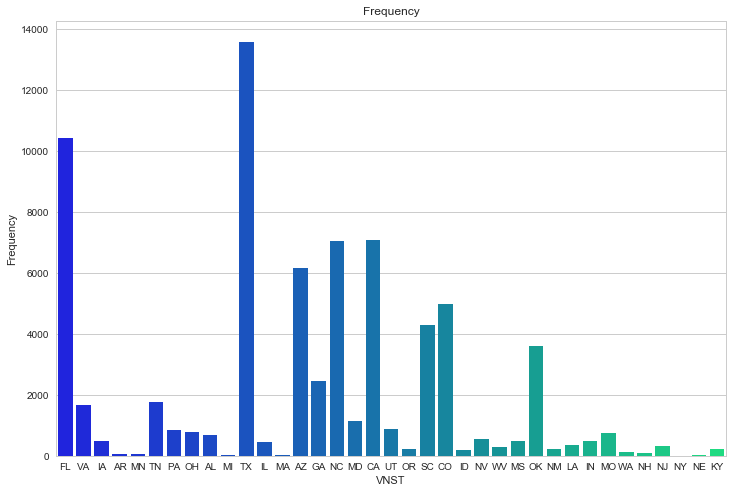

In [25]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="VNST", data=train,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('VNST')
plt.title('Frequency')
plt.show()

Common sense judgement: 
Features like vehicle age, make/manufacturer, model, transmission, odometer reading, acquisition type, level of guarantee,  kick-back date, acquisition cost, whether bought online or not, cost of warranty should have impact on the quality of the vehicle/deal

Delete redundant and non-useful info

In [26]:
X = X.drop(['PurchDate', 'VehYear', 'Trim', 'SubModel', 'VNZIP1', 'WheelType', 'BYRNO'], axis=1)

In [27]:
# limit to categorical data
Categr = X.select_dtypes(include=[object])

In [28]:
# limit to numerical data
Numer = X.select_dtypes(include=[np.number])

#### Step 3: feature engineering

Check for missing data

In [29]:
# count the number of NaN values in each column
X.isnull().sum()

Auction                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Color                                    8
Transmission                             9
WheelTypeID                           3169
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
VNST                                     0
VehBCost                                 0
IsOnlineSal

In [30]:
# Take care of missing values in numerical features
for col in Numer.columns:
    Numer[col] = Numer[col].fillna(Numer[col].median())

C:\Users\Shibo Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# Take care of missing values in categorical features
for col in Categr.columns:
    mode = Categr[col].mode()[0]
    Categr[col] = Categr[col].fillna(mode)

C:\Users\Shibo Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
Numer.isnull().sum()

VehicleAge                           0
WheelTypeID                          0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [33]:
Categr.isnull().sum()

Auction                 0
Make                    0
Model                   0
Color                   0
Transmission            0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
VNST                    0
dtype: int64

In [34]:
X = pd.concat([Categr, Numer], axis =1)

Encoding categorical data

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
le = LabelEncoder()
X.iloc[:, 0:11] = X.iloc[:, 0:11].apply(le.fit_transform)

In [37]:
ohc = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7,8,9,10])
X = ohc.fit_transform(X).toarray()

In [38]:
X.shape

(72983, 1193)

Conduct feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Conduct feature extraction using PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

#### Step 4: modeling

In [41]:
# use XGBoost algorithm
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
y_pred = classifier.predict(X)

#### Step 5: model evaluation

construct the confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [44]:
cm

array([[64006,     1],
       [ 8950,    26]])

conduct 10-fold cross-validation

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)

In [46]:
accuracies

array([ 0.87724346,  0.87724346,  0.87724346,  0.87710645,  0.87765447,
        0.87683244,  0.87736366,  0.86597232,  0.87707277,  0.8774839 ])

In [47]:
accuracies.mean()

0.87612163887697359

In [48]:
accuracies.std()

0.0033898652048632277